In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from utils import SyntheticDataset

from sklearn.datasets import make_blobs
from PIL import Image

Sklearn way

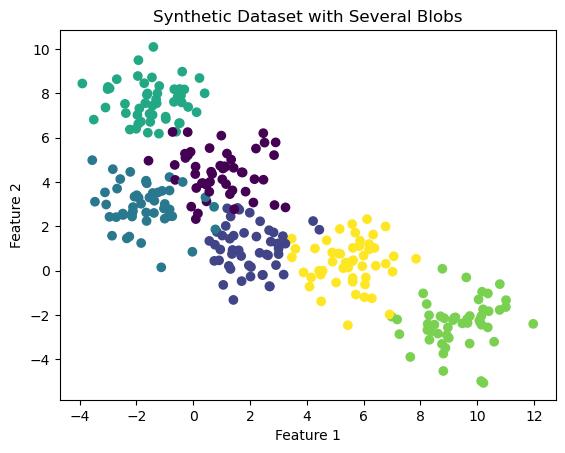

In [30]:
# Create a dataset with 3 blobs
X, y = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=1.0, random_state=0)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [31]:
X_extra, y_extra = make_blobs(n_samples = 150, centers=3, n_features=2, cluster_std=1.0, random_state=123)

no_samples = len(X_extra)
y_extra = np.random.randint(7, 10, no_samples)

X = np.vstack([X, X_extra.copy()])
y = np.hstack([y, y_extra.copy()])



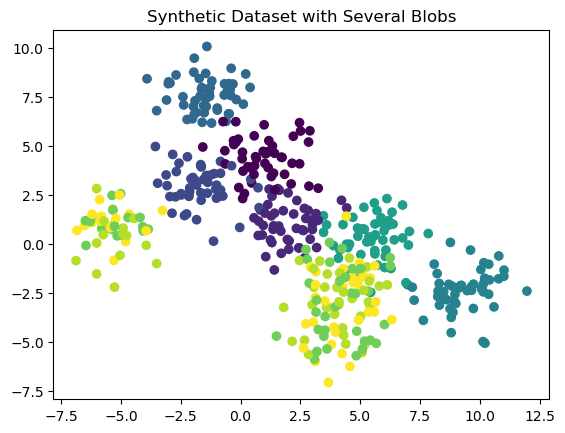

In [32]:
# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.show()

Numpy way

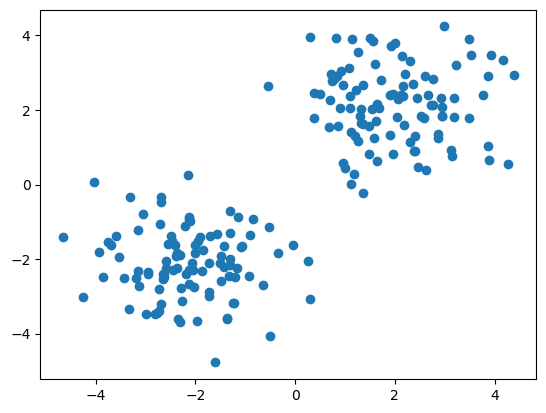

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

labels = []

# Generate samples
data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine the data from the two clusters
data = np.vstack((data1, data2))

# Plot
plt.scatter(data[:, 0], data[:, 1])
plt.show()


From Image

In [1]:
from utils import SyntheticDataset

# Replace 'your_image_path.jpg' with the path to your image
image_path = "C:/Users/Zayan/Documents/code/personal_repos/adaptive vector quantization/assets/dataset1.png"

dataset = SyntheticDataset(image_path)
dataset.generate_data_from_img()
df_numeric_classes = dataset.transform_to_numeric_classes('class')
df = dataset.get_dataset()


In [2]:
df

,coordinate,rgb,class
0,"(346, 229)","(63, 72, 204)",blue
1,"(346, 230)","(63, 72, 204)",blue
2,"(346, 231)","(63, 72, 204)",blue
3,"(346, 232)","(63, 72, 204)",blue
4,"(346, 233)","(63, 72, 204)",blue
...,...,...,...
6143,"(794, 388)","(237, 28, 36)",red
6144,"(794, 389)","(237, 28, 36)",red
6145,"(794, 390)","(237, 28, 36)",red
6146,"(794, 391)","(237, 28, 36)",red


In [3]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df['class'].value_counts()

class
red       2560
blue      1518
green     1417
yellow     653
Name: count, dtype: int64

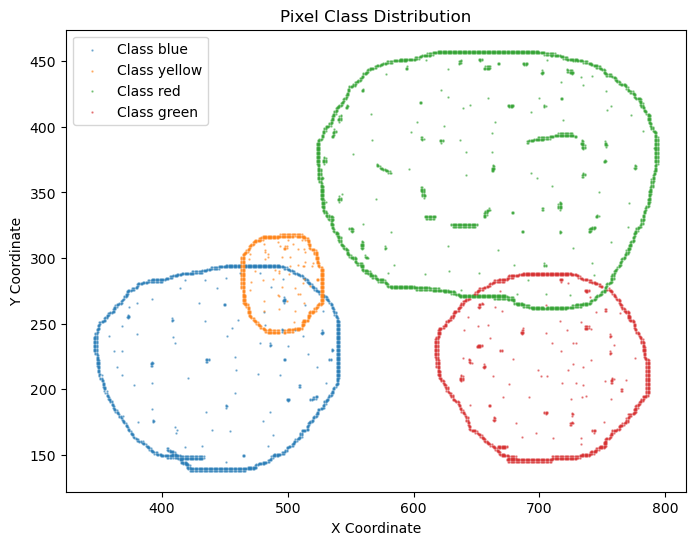

In [4]:
dataset.plot_data()

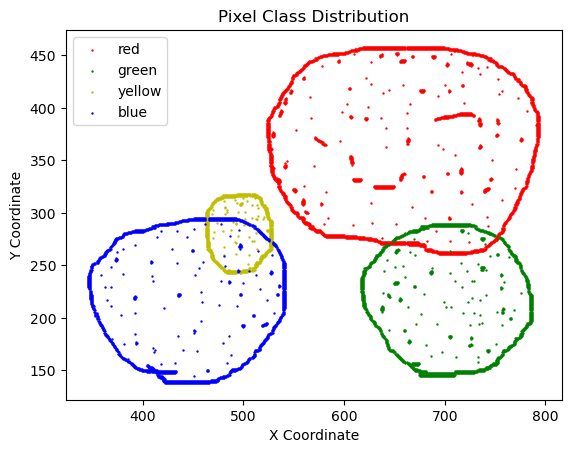

In [7]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# List of colors for plotting, should match the classes in your DataFrame
colors = {'red': 'r', 'green': 'g', 'yellow': 'y', 'blue': 'b'}

# Plot each class with its respective color
for label, color in colors.items():
    subset = df[df['class'] == label]
    subset_x = [coord[0] for coord in subset['coordinate']]
    subset_y = [coord[1] for coord in subset['coordinate']]

    ax.scatter(subset_x, subset_y, c=color, s=0.5, label=label)

# Optional: Invert y-axis to match the image's original coordinate system
# ax.invert_yaxis()

# Optional: Add legend and titles
ax.legend()
plt.title('Pixel Class Distribution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


## Neural Gas

In [ ]:
class NeuralGas:
    def __init__(self, dataset, n_neurons, decay=0.5, learning_rate=0.0001, lambda_=1.0, max_iter = 100, lifetime=10):

        
        if isinstance(dataset, pd.DataFrame):
            self.data = dataset.to_numpy()
        else:
            self.data = dataset

        self.n_neurons = n_neurons # number of prototype vectors/neurons/codebook vectors
        self.connections = np.zeros((n_neurons, n_neurons)) # initialize connections
        self.decay = decay
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.lifetime = lifetime

    def fit(self):
        
        
        

# Test with a few points

connections
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


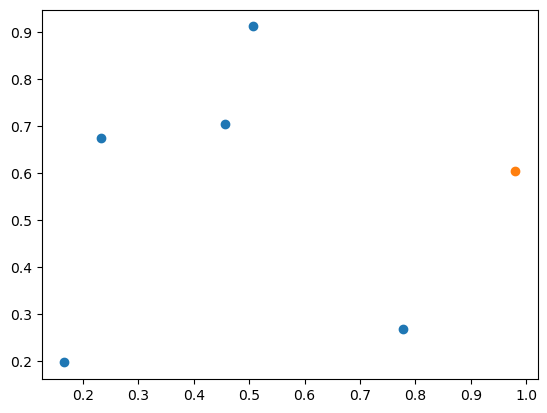

neurons =  [[0.50594266 0.91126902]
 [0.23167143 0.67517543]
 [0.16618661 0.19712122]
 [0.77753037 0.26865221]
 [0.45585339 0.70430359]]
input =  [[0.98056488 0.6036622 ]]
distances
[0.5655866  0.75230017 0.9102129  0.39173295 0.53427599]
Sorted indices for distances
[3 4 0 1 2]
closest neuron =  [0.77753037 0.26865221]
closest neuron =  [0.45585339 0.70430359]


In [30]:
# test

# create sample neurons and an input
points = np.random.rand(5,2)
v = np.random.rand(1,2)

connections = np.zeros((points.shape[0], points.shape[0]))
print("connections")
print(connections)

plt.figure()
plt.scatter(points[:,0], points[:,1])
plt.scatter(v[0][0], v[0][1])
plt.show()

# calculate distances
print("neurons = ", points)
print("input = ", v)
print("distances")
distances = np.linalg.norm(points-v, axis=1)
print(distances)

# sort distances 
print("Sorted indices for distances")
sorted_indices = np.argsort(distances)
print(sorted_indices)

# find closest and second closest neurons/codebooks/prototypes
closest_neuron = points[sorted_indices[0]]
second_closest_neuron = points[sorted_indices[1]]
print("closest neuron = ", closest_neuron)
print("closest neuron = ", second_closest_neuron)

# make connection and plot connection

